<a href="https://colab.research.google.com/github/suryaprakash20/Internship-at-The-Sparks-Foundation/blob/main/Task_5_predict_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prediction using Decision Tree

Algorithm
(Level - Intermediate)

● Create the Decision Tree classifier and visualize it graphically.


● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.


--surya prakash.V



In [3]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df = pd.read_csv("Iris.csv",) #load the dataset


In [61]:
df.head(5) #show the from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Removing the unneeded column

In [62]:
df.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the datafram

In [66]:
 dff=df.columns
 dff

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Some Exploratory Data Analysis With Iris

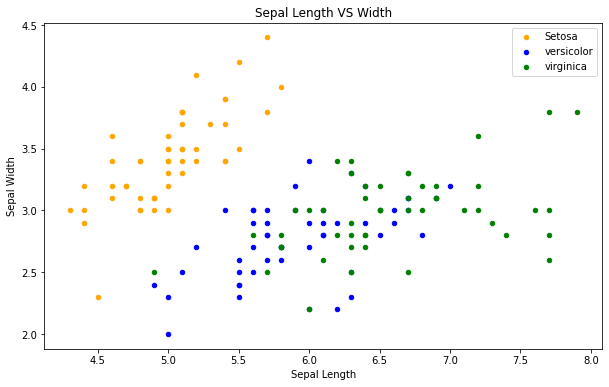

In [12]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

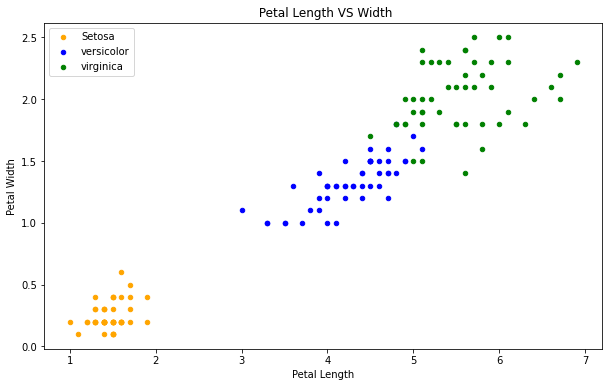

In [13]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

### Now let us see how are the length and width are distributed

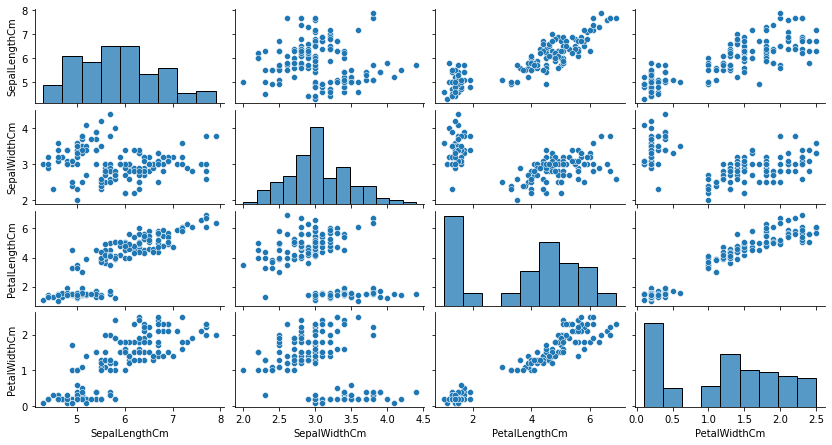

In [19]:
sns.pairplot(df)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Now let us see how the length and width vary according to the species

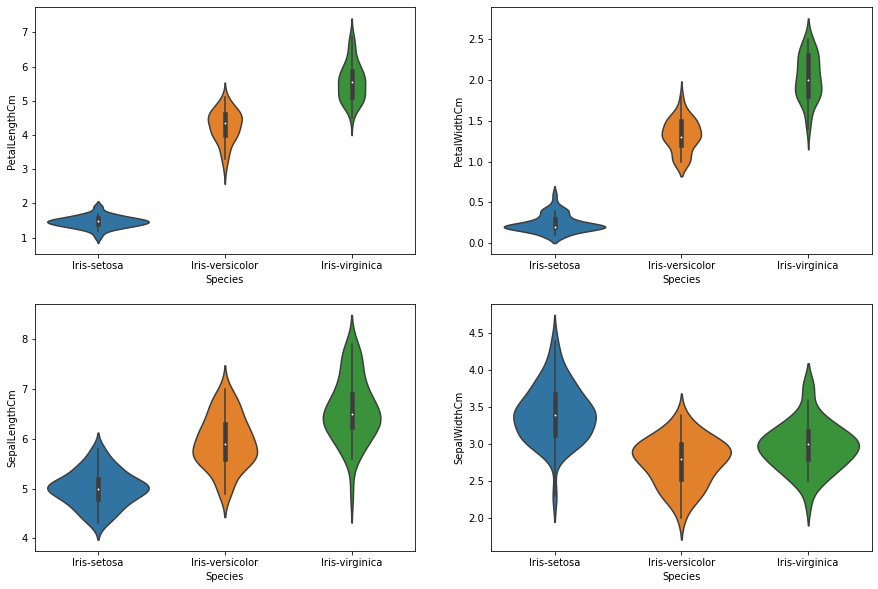

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
**Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

**Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

**attributes**-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as **Features**.

**Target variable**, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [23]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.model_selection import train_test_split #to split the dataset for training and testing

from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [24]:
df.shape #get the shape of the dataset

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

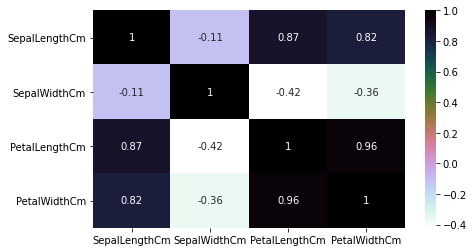

In [25]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

**Observation--->**

The Sepal Width and Length are not correlated
The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps To Be followed When Applying an Algorithm

 1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
 2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
 3. Then pass the training dataset to the algorithm to train it. We use the **.fit()** method
 4. Then pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
 5. We then check the accuracy by **passing the predicted outcome and the actual output** to the model.

### Splitting The Data into Training And Testing Dataset

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [78]:
X = df.drop('Species', axis=1)
y = df['Species']

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [81]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [85]:
print(X_val.shape)
print(y_val.shape)

(30, 4)
(30,)


In [87]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [88]:
pd.DataFrame({'Actual':y_val, 'Predicted':y_pred})

,Actual,Predicted
39,Iris-setosa,Iris-setosa
15,Iris-setosa,Iris-setosa
89,Iris-versicolor,Iris-versicolor
30,Iris-setosa,Iris-setosa
13,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
87,Iris-versicolor,Iris-versicolor
128,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
81,Iris-versicolor,Iris-versicolor


In [90]:
from sklearn import tree
text = tree.export_text(model)
print(text)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- feature_0 <= 5.80
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_0 >  5.80
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [92]:
features = df.columns.tolist()[:-1]
target = df.Species.unique()
print(features)
print(target)


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


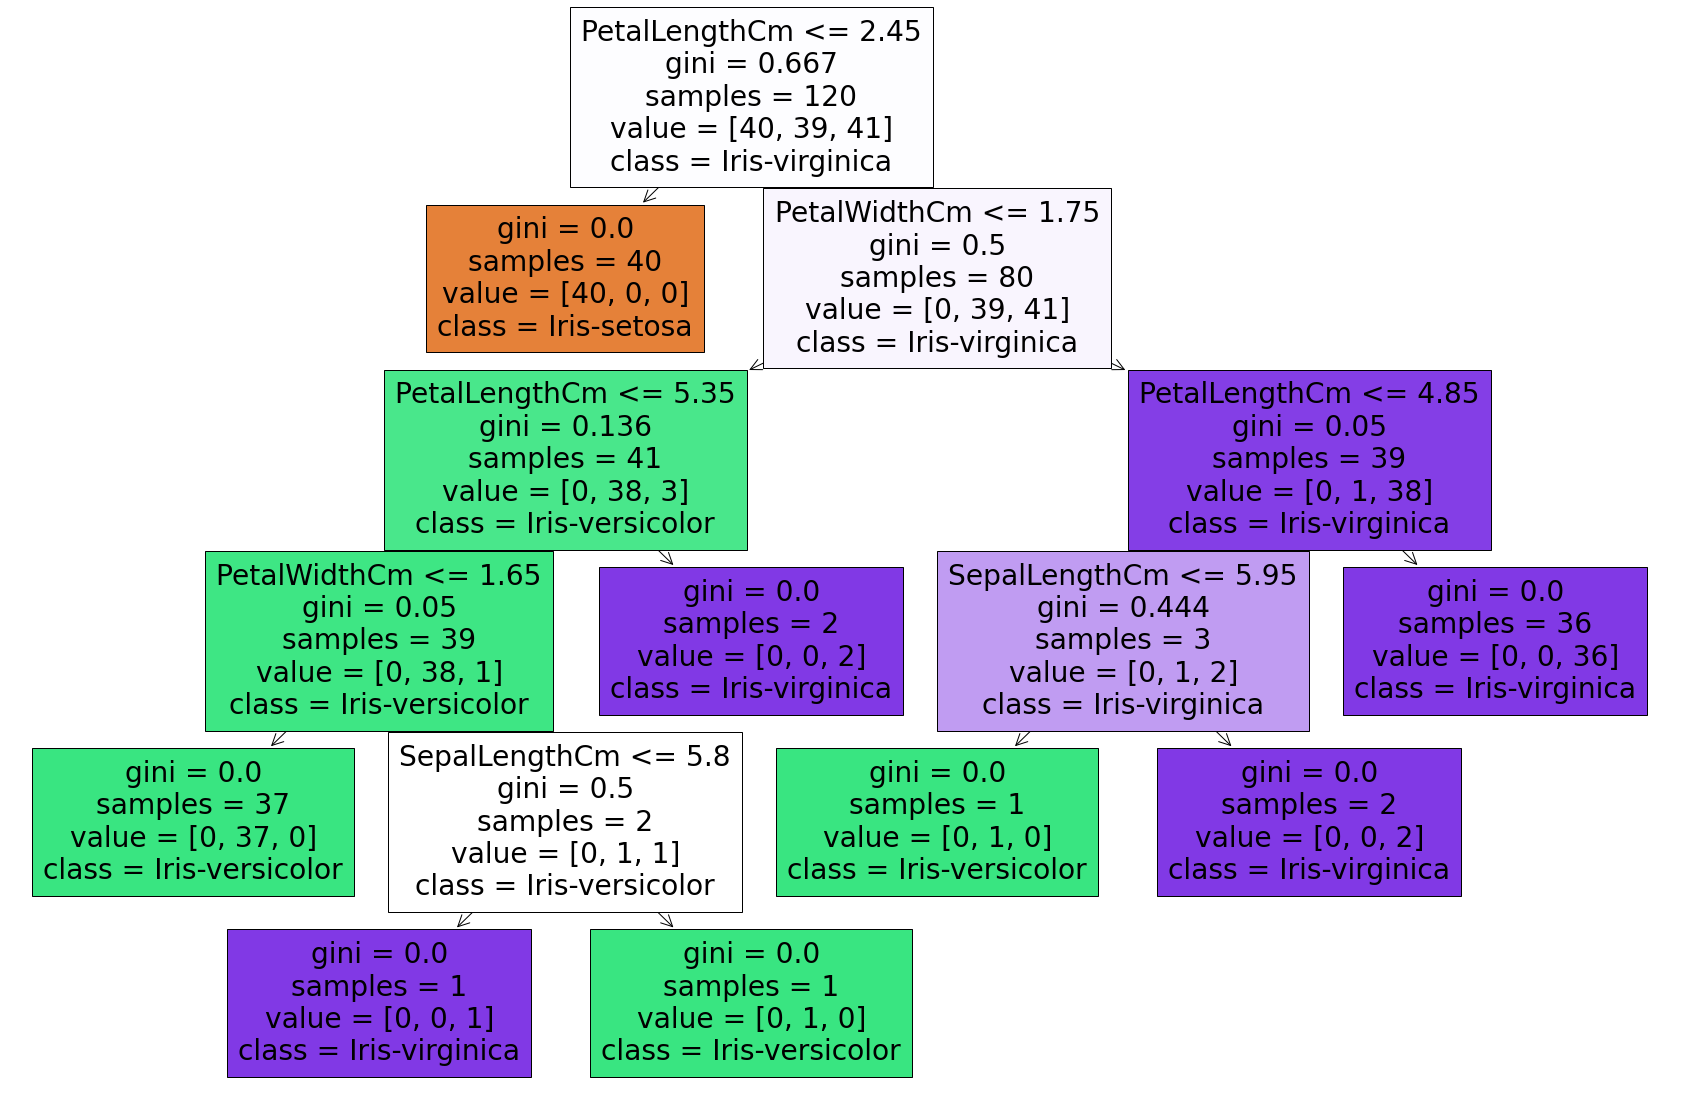

In [93]:
fig = plt.figure(figsize=(30,20))
plot = tree.plot_tree(model, feature_names=features,  
                      class_names=target, filled=True)



Thank You!!